In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
     

In [2]:
df = pd.read_csv('drug.csv')
df
   

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


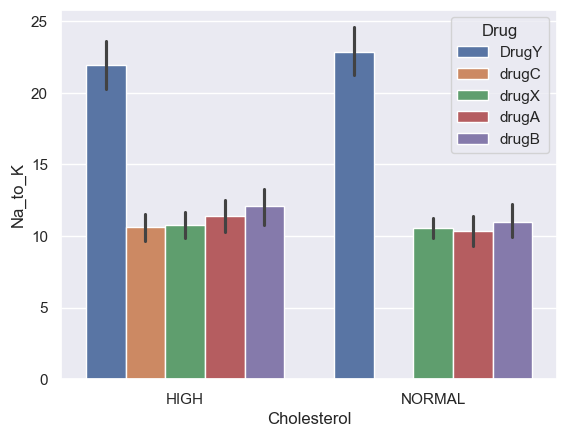

In [4]:
sns.barplot(data=df, x="Cholesterol",y="Na_to_K", hue="Drug")
plt.show()

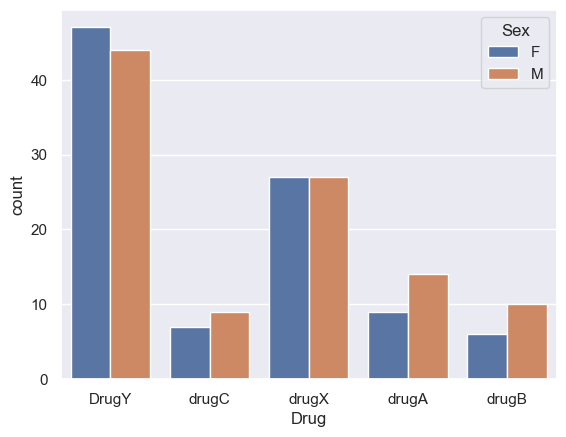

In [5]:
sns.countplot(data=df, x="Drug", hue="Sex")
plt.show()

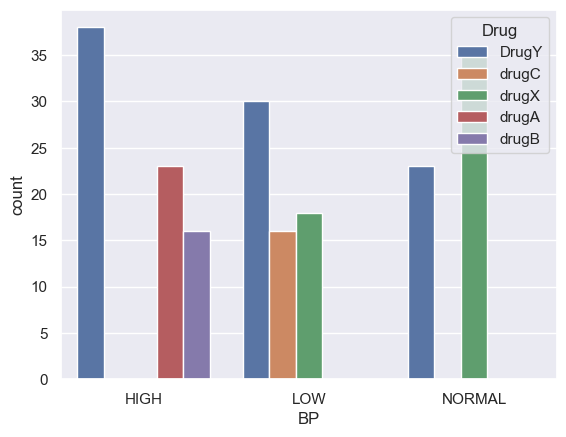

In [6]:
sns.countplot(data=df, x="BP", hue="Drug")
plt.show()    

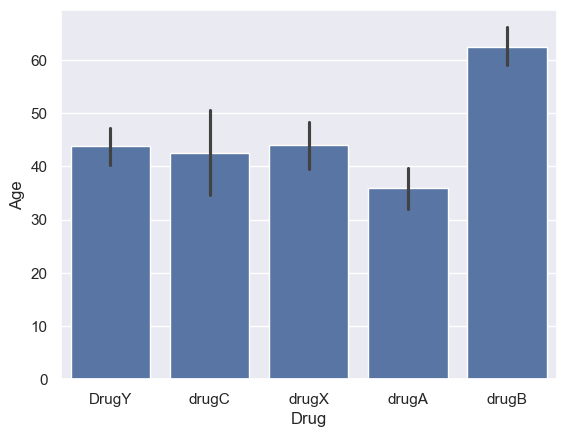

In [7]:
sns.barplot(data=df, x="Drug", y="Age")
plt.show()

In [8]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [9]:

df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [10]:

df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [11]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [12]:
#Change value in Sex column
df['Sex'] = df['Sex'].replace(['F'],'0')
df['Sex'] = df['Sex'].replace(['M'],'1')
#Change value in BP column
df['BP'] = df['BP'].replace(['LOW'],'0')
df['BP'] = df['BP'].replace(['NORMAL'],'1')
df['BP'] = df['BP'].replace(['HIGH'],'2')
#Change value in Cholesterol column
df['Cholesterol'] = df['Cholesterol'].replace(['NORMAL'],'0')
df['Cholesterol'] = df['Cholesterol'].replace(['HIGH'],'1')
#Change value in Drug column
df['Drug'] = df['Drug'].replace(['DrugY'],'0')
df['Drug'] = df['Drug'].replace(['drugC'],'1')
df['Drug'] = df['Drug'].replace(['drugX'],'2')
df['Drug'] = df['Drug'].replace(['drugA'],'3')
df['Drug'] = df['Drug'].replace(['drugB'],'4')
df.head()
     

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,0
1,47,1,0,1,13.093,1
2,47,1,0,1,10.114,1
3,28,0,1,1,7.798,2
4,61,0,0,1,18.043,0


In [13]:
# convert object data types column to integer
df['Sex'] = pd.to_numeric(df['Sex'])
df['BP'] = pd.to_numeric(df['BP'])
df['Cholesterol'] = pd.to_numeric(df['Cholesterol'])
df['Drug'] = pd.to_numeric(df['Drug'])
df.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug             int64
dtype: object

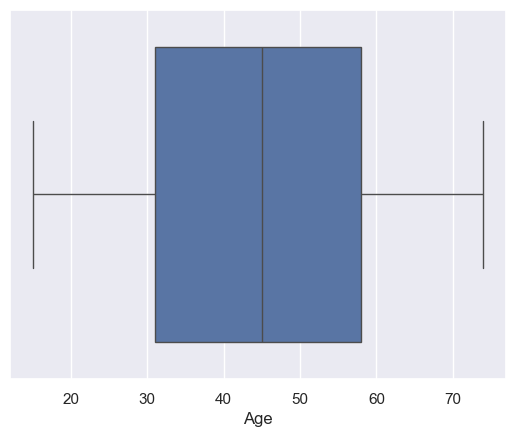

In [14]:

sns.boxplot(x=df["Age"])
plt.show()

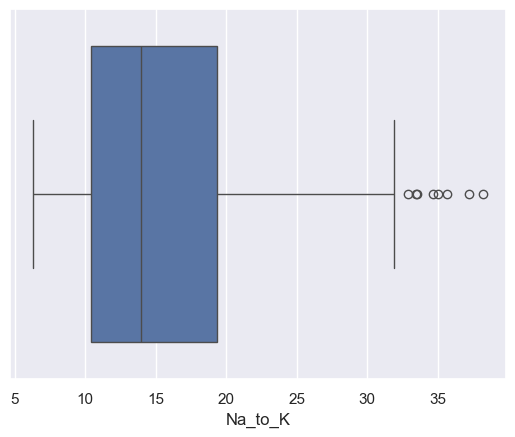

In [15]:
sns.boxplot(x=df["Na_to_K"])
plt.show()

In [16]:
import scipy.stats as stats
import numpy as np
z = np.abs(stats.zscore(df))
data_clean = df[(z<3).all(axis = 1)] 
data_clean.shape

(199, 6)

In [17]:
df[~df.index.isin(data_clean.index)]
     

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
96,58,0,0,1,38.247,0


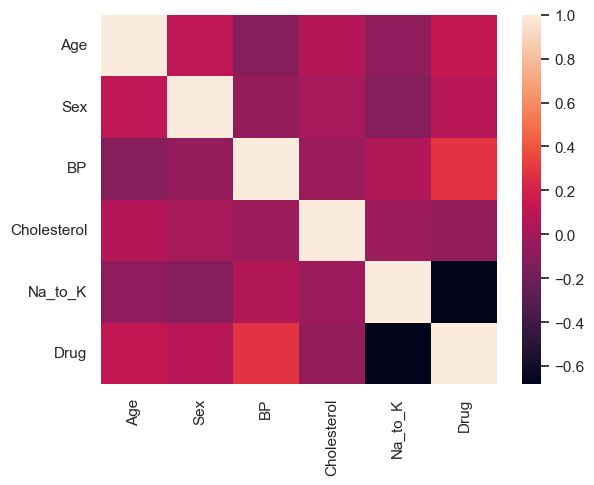

In [18]:
sns.heatmap(data_clean.corr(), fmt='.2g')
plt.show()

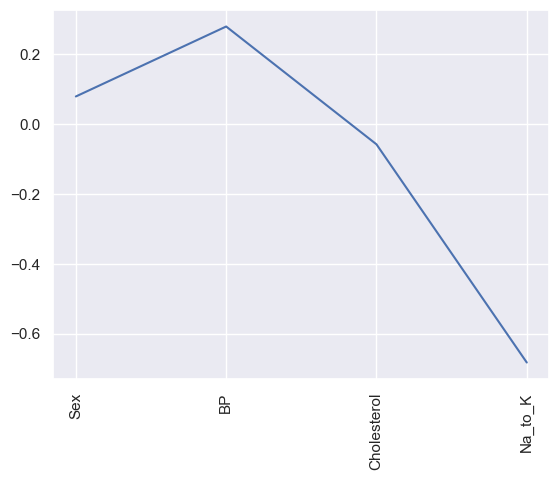

In [19]:

corr = data_clean[data_clean.columns[1:]].corr()['Drug'][:-1]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

In [20]:
X = data_clean.drop('Drug', axis=1)
y = data_clean['Drug']
     

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
     

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [24]:

y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")
     


Accuracy Score : 97.5 %


In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='weighted')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='weighted')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='weighted')))

F-1 Score :  0.975
Precision Score :  0.98125
Recall Score :  0.975


Text(0.5, 1.0, 'Accuracy Score: 97.5')

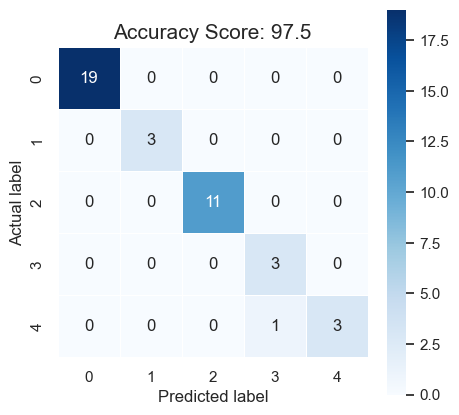

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

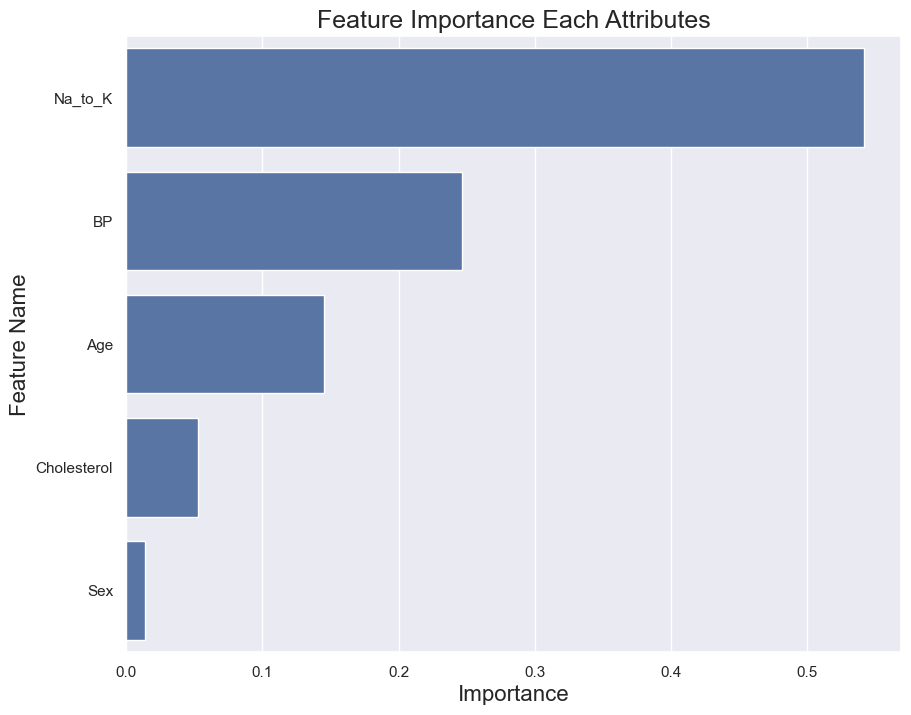

In [27]:

#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [28]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train, y_train)

C:\Users\Admin\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=0)

In [29]:

y_pred = ada.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")
     

Accuracy Score : 82.5 %


In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='weighted')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='weighted')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='weighted')))
     

F-1 Score :  0.762
Precision Score :  0.7232142857142857
Recall Score :  0.825


C:\Users\Admin\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0.5, 1.0, 'Accuracy Score: 82.5')

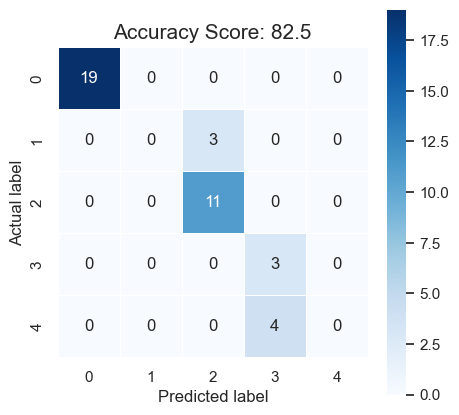

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(ada.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)
     

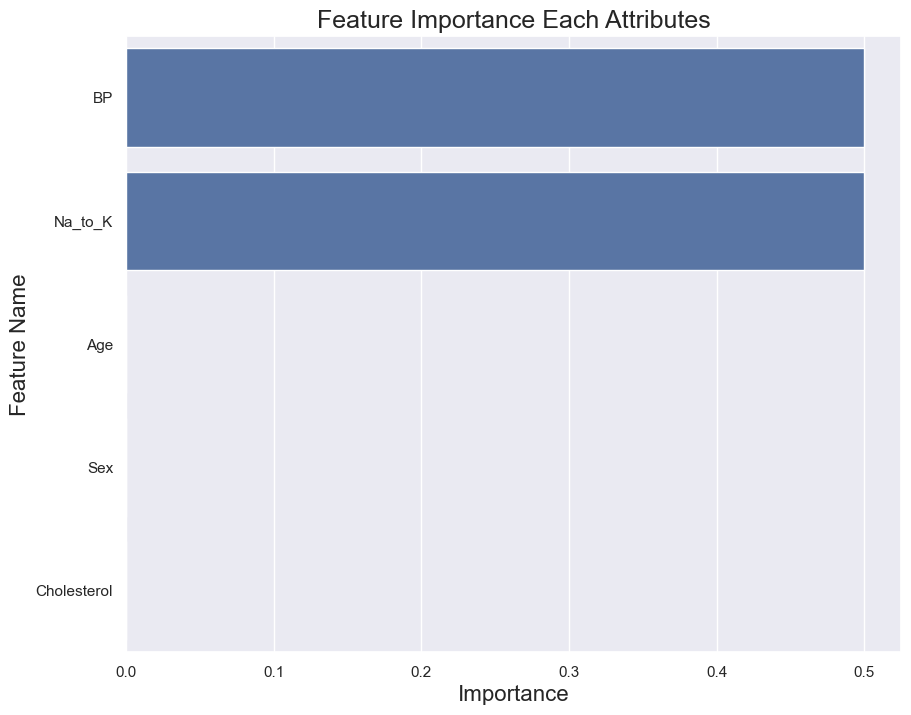

In [32]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": ada.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()